# Numerical methods for SDEs: Euler scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

We apply the Euler discretization scheme to the GBM SDE
\begin{equation}
S_{i+1} = S_i + \mu S_i \Delta t + \sigma S_i \Delta W_{i+1}.
\end{equation}

We compare the approximation with the exact solution obtained by
\begin{equation}
    S(t_{i+1}) = S(t_i)\exp\{(\mu-\frac{1}{2}\sigma^2) \Delta t + \sigma\Delta W(t_{i+1})\}.
\end{equation}

In [2]:
def GeneratePathsGBMEuler(NoOfSteps, T, mu, sigma, S_0, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] = S_0
    
    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] = S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    
    for i in range(0,NoOfSteps):
        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + mu * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        S2[:,i+1] = S2[:,i] * np.exp((mu - 0.5*sigma*sigma) * dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] + dt
        
    # Return S1 and S2
    paths = {"time":time, "S1":S1, "S2":S2}

    return paths

In [3]:
# Define the parameters
N = 10 # number of simulations
m = 8 # time steps
T = 1 # horizon
mu = 0.06
sigma = 0.3
S0 = 50

In [4]:
# Simulated paths

Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

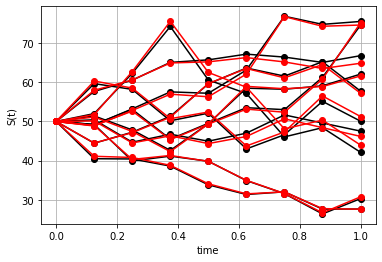

In [5]:
plt.figure(1)
plt.plot(timeGrid, np.transpose(S1), 'k-o') # approximation
plt.plot(timeGrid, np.transpose(S2), '-or') # exact
plt.grid()
plt.xlabel("time");
plt.ylabel("S(t)");

### Second version

In [10]:
#### Here the code must be completed

def GeneratePathsGBMEuler2(NoOfSteps, NoOfSteps_exact, T, mu, sigma, S_0, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps_exact])
    W = np.zeros([NoOfPaths, NoOfSteps_exact+1])
    
    Z1 = np.zeros([NoOfPaths, NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    
    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps_exact+1])
    S2[:,0] = S_0
    
    time = np.zeros([NoOfSteps_exact+1])
        
    dt = T / float(NoOfSteps_exact)
    M = int(NoOfSteps_exact/NoOfSteps)
    
    for i in range(0, NoOfSteps_exact):
        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S2[:,i+1] = S2[:,i] * np.exp((mu - 0.5*sigma*sigma) * dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] + dt
        
    
        if i < NoOfSteps: 
            Z1[:, i] = np.sum(Z[:,M*i:(i+1)*M], axis = 1)
            W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
            
            S1[:,i+1] = S1[:,i] + mu * S1[:,i]* M*dt + sigma * S1[:,i] * (W1[:,i+1] - W1[:,i])

    # Return S1 and S2
    paths = {"time":time, "S1":S1, "S2":S2}

    return paths

In [17]:
# Define the parameters
N = 1 # number of simulations
m = 2**6 # time steps
m_exact = 2**9
T = 1 # horizon
mu = 0.06
sigma = 0.3
S0 = 50

In [18]:
# Simulated paths
Paths = GeneratePathsGBMEuler2(m, m_exact, T, mu, sigma, S0, N)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

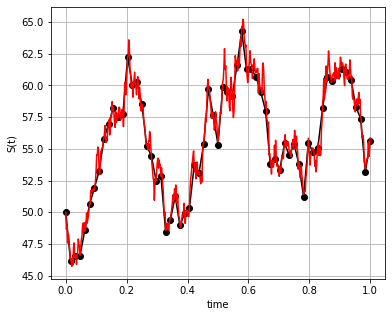

In [19]:
plt.figure(1, figsize = (6,5))
M = int(m_exact/m)
plt.plot(timeGrid[::M], np.transpose(S1), 'k-o')   
plt.plot(timeGrid, np.transpose(S2), '-r')   
plt.grid()
plt.xlabel("time");
plt.ylabel("S(t)");

### Strong convergence

In [44]:
# Strong convergence

NoOfStepsV = range(1,500,1)
N = 1000
errorStrong = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])

for idx, m in enumerate(NoOfStepsV):
    Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)

    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    
    errorStrong[idx] = np.mean(np.abs(S1_atT-S2_atT))
    dtV[i dx] = T/m  

In [50]:
errorStrong

array([[2.24504573],
       [1.7764474 ],
       [1.43652004],
       [1.29876938],
       [1.18216837],
       [1.06491825],
       [0.9882394 ],
       [0.93756532],
       [0.87766505],
       [0.81912719],
       [0.76607586],
       [0.74495516],
       [0.7468487 ],
       [0.68808667],
       [0.68865027],
       [0.64727426],
       [0.6501463 ],
       [0.63451825],
       [0.60455331],
       [0.59521631],
       [0.57750627],
       [0.58680767],
       [0.56032849],
       [0.56142485],
       [0.53545935],
       [0.52283615],
       [0.52081192],
       [0.52028142],
       [0.48706087],
       [0.49059009],
       [0.4898074 ],
       [0.47753555],
       [0.46030159],
       [0.45312232],
       [0.45950898],
       [0.45570308],
       [0.45147272],
       [0.42662781],
       [0.4125512 ],
       [0.41674845],
       [0.42577705],
       [0.40785104],
       [0.39671339],
       [0.4152473 ],
       [0.38973013],
       [0.38049125],
       [0.3771742 ],
       [0.386

(0.0, 2.5)

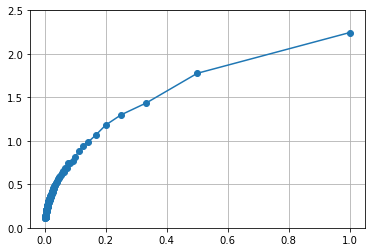

In [45]:
plt.figure(2)
plt.plot(dtV,errorStrong, '-o')
plt.grid()
plt.ylim([0, 2.5])

In [51]:
# Weak convergence

NoOfStepsV = range(1,500,1)
N = 10000
errorWeak = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])

for idx, m in enumerate(NoOfStepsV):
    Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)

    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    
    errorWeak[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))
    dtV[idx] = T/m  

(0.0, 0.5)

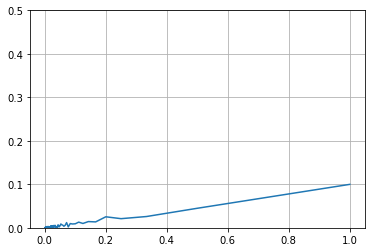

In [53]:
plt.figure(2)
plt.plot(dtV,errorWeak)
plt.grid()
plt.ylim([0, .5])